# Project NLP - Next Word Prediction

## Assignment

You've certainly heard about the GPT language models that are used by many AI tools such as ChatGPT. What these models do, in simple terms, they try to accurately predict what the most logical next word would be given an input. In this project, you will try to implement a similar model, of course, much less advanced. Select a set of training data with a lot of real-life text (e.g. a book) and use it to train a neural network which, given input with a couple of words, returns the list of the most probable words that would make for a logical continuation.

### Import packages that we need for this project

In [90]:
import re
import matplotlib.pyplot as plt
import random

## I. Start by reading in the text data and splitting the long text into individual words;

In [91]:
data_path = "../data/datasets/book.txt"

""" count = 0  # Compteur pour les lignes lues
max_lines = 30  # Nombre de lignes à lire

with open(data_path) as file:
    for line in file:
        print(line.strip())  # Affiche chaque ligne (avec suppression des espaces inutiles)
        count += 1
        if count == max_lines:  # Lorsque la 20ème ligne est atteinte, on arrête
            break """
            
with open(data_path) as file:
    text = file.read()
    

We'll put all the text to lower case and we'll delete all special character exepct words in whitespace. After that, we split this text, they'll become tokens and those tokens are going into list data structure.

In [92]:
# Put all words in lowercase
text = text.lower()
# Delete all special character except words en whitespace
text = re.sub(r'[^a-z\s]', '', text)
# We split the text in words
words = text.split()

# We have now a list who contains all words from book.txt
# We stop at index = 30 for lisibility
print(words)

# Filtrer et afficher uniquement les éléments qui sont des nombres
#numbers = [item for item in words if item.isdigit()]
#print(numbers)

['project', 'gutenbergs', 'the', 'adventures', 'of', 'sherlock', 'holmes', 'by', 'arthur', 'conan', 'doyle', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'or', 'reuse', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'wwwgutenbergnet', 'title', 'the', 'adventures', 'of', 'sherlock', 'holmes', 'author', 'arthur', 'conan', 'doyle', 'release', 'date', 'november', 'ebook', 'last', 'updated', 'may', 'language', 'english', 'character', 'set', 'encoding', 'utf', 'start', 'of', 'this', 'project', 'gutenberg', 'ebook', 'the', 'adventures', 'of', 'sherlock', 'holmes', 'produced', 'by', 'an', 'anonymous', 'project', 'gutenberg', 'volunteer', 'and', 'jose', 'menendez', 'cover', 'the', 'adventures', 'of', 'sherlock', 'holmes', 'by', 'arthur', 'conan', 'do

## II. Feel free to explore, analyze and describe the text using statistics such as you would do with any other dataset; look for the most and least frequently occurring words as well as common combinations of two consecutive words - you can use these findings for testing later;

We use collections packages for thoses operation (most common words, less common words, etc...)

In [93]:
from collections import Counter

words_count = Counter(words)
# We can see counter of each word into words list
#print(words_count)

In [94]:
# See the most common word count that is use in text
print(words_count.most_common(10))

[('the', 5805), ('and', 3070), ('i', 2995), ('of', 2778), ('to', 2762), ('a', 2683), ('in', 1818), ('that', 1750), ('it', 1710), ('you', 1545)]


Write some functions for free to explore, we just use HashMap for this part. We can use collections packages like before (Counter, most_common) but I prefer write some code, use some data structure (list, hash_map, etc...)

In [95]:
# Function
# Get all data words from list into a HashMap
def get_data_into_hash_map(words):
    
    hash_map_words = {}
    
    for word in words:
        if word not in hash_map_words:
            hash_map_words[word] = 1
        else:
            hash_map_words[word] += 1
            
    return hash_map_words

In [96]:
### TEST get_data_into_hash_map() function ###

test_list = ["le", "chien", "est", "trop", "mignon", "chien", "le", "chat"]
data_hm = get_data_into_hash_map(test_list)

print(data_hm)

{'le': 2, 'chien': 2, 'est': 1, 'trop': 1, 'mignon': 1, 'chat': 1}


In [97]:
### TEST get_data_into_hash_map() function ###
# With the real data : list words
data_dict = get_data_into_hash_map(words)
#print(data_dict)

In [98]:
# Function
# Give us the 10 most common words (number = 10)

def get_most_common_words(number, hash_map):
    # Trier les items par leur fréquence, en ordre décroissant
    sorted_words = sorted(hash_map.items(), key=lambda x: x[1], reverse=True)
    
    #print(sorted_words)
    
    # Extraire les mots les plus fréquents
    result = {word: freq for word, freq in sorted_words[:number]}
    
    return result
        


In [99]:
## TEST ##

most_common_word = get_most_common_words(3, data_dict)
print(most_common_word)

{'the': 5805, 'and': 3070, 'i': 2995}


In [100]:
# Function
# Give us the 10 less common words (number = 10)

def get_less_common_words(number, hash_map):
    # Trier les items par leur fréquence, en ordre croissant
    sorted_words = sorted(hash_map.items(), key=lambda x: x[1])
    
    # Extraire les mots les plus fréquents
    result = {word: freq for word, freq in sorted_words[:number]}
    
    return result

In [101]:
## TEST ##

less_common_word = get_less_common_words(10, data_dict)
print(less_common_word)

{'gutenbergs': 1, 'wwwgutenbergnet': 1, 'author': 1, 'release': 1, 'november': 1, 'encoding': 1, 'utf': 1, 'eclipses': 1, 'predominates': 1, 'sex': 1}


In [102]:
# Example chatgpt

""" from collections import Counter

def get_common_consecutive_pairs(words, top_n=10):
    # Step 2: Create pairs of consecutive words
    word_pairs = zip(words, words[1:])
    
    # Step 3: Count the frequency of each pair
    pair_counts = Counter(word_pairs)
    
    # Get the most common pairs
    common_pairs = pair_counts.most_common(top_n)
    
    return common_pairs """

' from collections import Counter\n\ndef get_common_consecutive_pairs(words, top_n=10):\n    # Step 2: Create pairs of consecutive words\n    word_pairs = zip(words, words[1:])\n    \n    # Step 3: Count the frequency of each pair\n    pair_counts = Counter(word_pairs)\n    \n    # Get the most common pairs\n    common_pairs = pair_counts.most_common(top_n)\n    \n    return common_pairs '

In [103]:
# Function
# Give us n combination of 2 consecutifs words

def combination_two_consecutifs_words(words):
    
    # Create pairs of consecutive words
    word_pairs = zip(words, words[1:])
    
    # Count of each consecutifs words
    pair_counts = get_data_into_hash_map(word_pairs)
    
    # Get the most common pairs
    #common_pairs = get_most_common_words(10, pair_counts)
    
    return pair_counts

In [104]:
## Test code (combination_two_consecutifs_words) ##

#word_pair = combination_two_consecutifs_words(words)
#print(word_pair)

In [105]:
# Function
# Give us n combination of 2 most common / less common consecutifs words

def combination_two_consecutifs_words_most_or_less(words, condition, counts):
    
     pairs_counts = combination_two_consecutifs_words(words)
     
     if (condition == "most"):
        common_pairs = get_most_common_words(counts, pairs_counts)
        return common_pairs
     
     else:
        less_common_word = get_less_common_words(counts, pairs_counts)
        return less_common_word

In [106]:
## Test ##

print(combination_two_consecutifs_words_most_or_less(words, "most", 10))

{('of', 'the'): 743, ('in', 'the'): 522, ('it', 'is'): 336, ('to', 'the'): 319, ('i', 'have'): 299, ('it', 'was'): 276, ('that', 'i'): 256, ('at', 'the'): 240, ('and', 'i'): 214, ('and', 'the'): 203}


### We'll keep some data from these use

In [107]:
# Data in a dict and we have the number of iterations of each word in value.
data_dict = get_data_into_hash_map(words)
#print(data_dict)

In [108]:
# From data_dict, we got most_common_word used
most_common_word = get_most_common_words(30, data_dict)
print(most_common_word)

{'the': 5805, 'and': 3070, 'i': 2995, 'of': 2778, 'to': 2762, 'a': 2683, 'in': 1818, 'that': 1750, 'it': 1710, 'you': 1545, 'he': 1465, 'was': 1410, 'his': 1159, 'is': 1146, 'my': 1006, 'have': 928, 'with': 878, 'as': 861, 'had': 830, 'at': 780, 'which': 776, 'for': 751, 'not': 662, 'but': 652, 'be': 646, 'me': 634, 'this': 534, 'we': 532, 'from': 511, 'there': 504}


In [109]:
# From data_dict, we got less_common_word used
less_common_word = get_less_common_words(30, data_dict)
print(less_common_word)

{'gutenbergs': 1, 'wwwgutenbergnet': 1, 'author': 1, 'release': 1, 'november': 1, 'encoding': 1, 'utf': 1, 'eclipses': 1, 'predominates': 1, 'sex': 1, 'emotions': 1, 'abhorrent': 1, 'balanced': 1, 'softer': 1, 'passions': 1, 'gibe': 1, 'observerexcellent': 1, 'intrusions': 1, 'finely': 1, 'temperament': 1, 'distracting': 1, 'mental': 1, 'grit': 1, 'sensitive': 1, 'highpower': 1, 'lenses': 1, 'disturbing': 1, 'dubious': 1, 'homecentred': 1, 'establishment': 1}


In [110]:
# From data_dict, we got two_consecutifs_words data
word_dict_pair = combination_two_consecutifs_words(words)
#print(word_dict_pair)

In [111]:
word_dict_pair_most_common_used = combination_two_consecutifs_words_most_or_less(words, "most", 30)
print(word_dict_pair_most_common_used)

{('of', 'the'): 743, ('in', 'the'): 522, ('it', 'is'): 336, ('to', 'the'): 319, ('i', 'have'): 299, ('it', 'was'): 276, ('that', 'i'): 256, ('at', 'the'): 240, ('and', 'i'): 214, ('and', 'the'): 203, ('to', 'be'): 200, ('upon', 'the'): 196, ('i', 'was'): 186, ('with', 'a'): 184, ('i', 'am'): 181, ('of', 'a'): 175, ('i', 'had'): 168, ('was', 'a'): 159, ('with', 'the'): 156, ('that', 'he'): 154, ('that', 'the'): 154, ('he', 'was'): 151, ('is', 'a'): 147, ('on', 'the'): 146, ('in', 'a'): 142, ('said', 'he'): 141, ('from', 'the'): 138, ('you', 'have'): 137, ('to', 'me'): 133, ('of', 'his'): 131}


In [112]:
word_dict_pair_less_common_used = combination_two_consecutifs_words_most_or_less(words, "less", 10)
print(word_dict_pair_less_common_used)

{('project', 'gutenbergs'): 1, ('gutenbergs', 'the'): 1, ('doyle', 'this'): 1, ('anywhere', 'at'): 1, ('at', 'wwwgutenbergnet'): 1, ('wwwgutenbergnet', 'title'): 1, ('title', 'the'): 1, ('holmes', 'author'): 1, ('author', 'arthur'): 1, ('doyle', 'release'): 1}


### We'll make a graph to visualize the current data that we got before. (Most / less common word | Most pair of 2 consecutifs words)

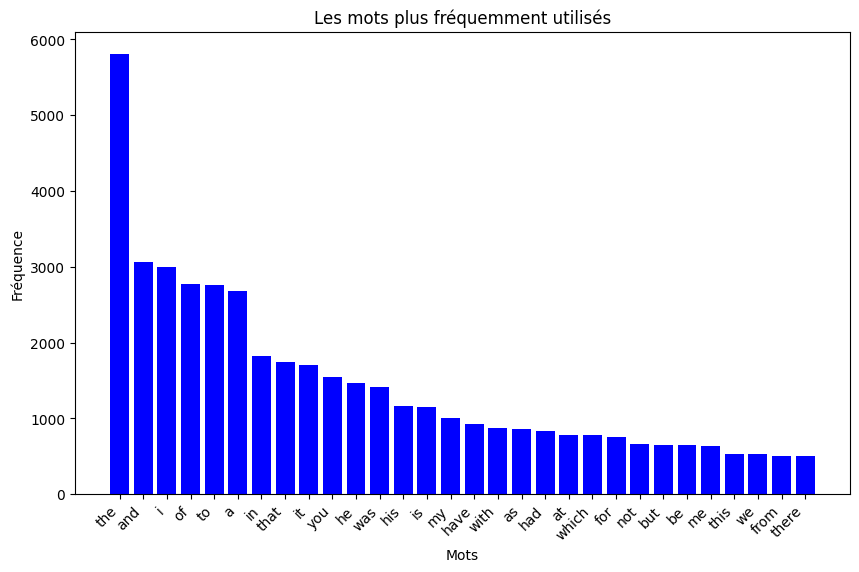

In [113]:
# Extraire les mots et leurs fréquences
words, counts = zip(*most_common_word.items())
    
# Création du diagramme en barres
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title(f'Les mots plus fréquemment utilisés')
plt.show()


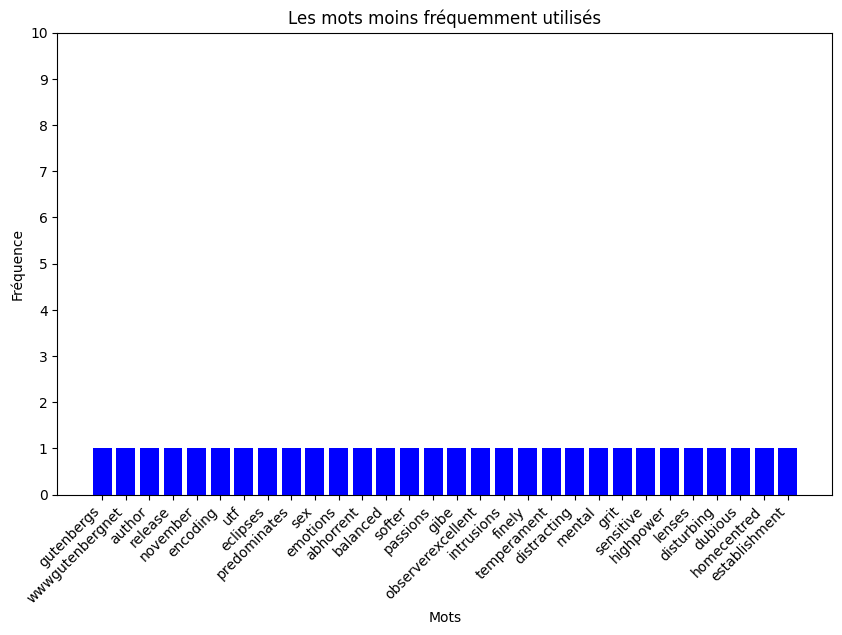

In [114]:
# Extraire les mots et leurs fréquences
words, counts = zip(*less_common_word.items())
    
# Création du diagramme en barres
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='blue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Mots')
plt.ylabel('Fréquence')
plt.title(f'Les mots moins fréquemment utilisés')

# Personnaliser l'axe des ordonnées (y-axis) avec des valeurs de 0 à 10
plt.yticks(range(0, 11, 1))  # Ici, on va de 0 à 10 avec un intervalle de 1

plt.show()

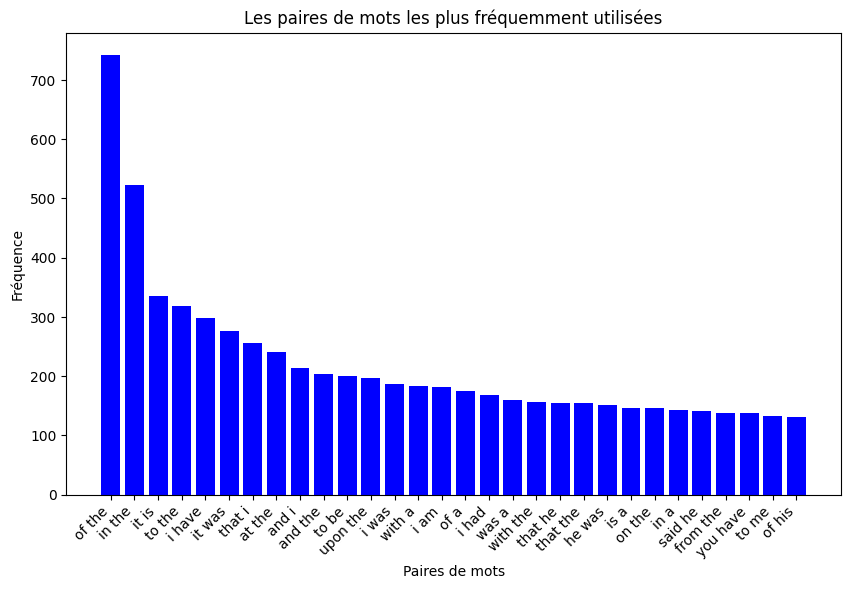

In [115]:
# Extraire les mots et leurs fréquences
word_pairs, counts = zip(*word_dict_pair_most_common_used.items())
    
# Création du diagramme en barres
plt.figure(figsize=(10, 6))
plt.bar([" ".join(pair) for pair in word_pairs], counts, color='blue')  # Convertir les paires en chaînes de caractères
plt.xticks(rotation=45, ha='right')
plt.xlabel('Paires de mots')
plt.ylabel('Fréquence')
plt.title('Les paires de mots les plus fréquemment utilisées')

plt.show()

## III. For simplicity, let's select a set length of input X, e.g. 5 words; feel free to experiment with different lengths

I'll extract a sentence from my dataset BOOK.TXT, the ideal is extract a chunks of 5 words from my dataset.

In [116]:
# I'll drop a random sentence from the dataset

# Step 1: Read the content of the text file
with open("../data/datasets/book.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Put all words in lowercase
text = text.lower()
# Delete all special character except words en whitespace
text = re.sub(r'[^a-z\s]', '', text)

# Step 2: Split the text into words
words = text.split()

# Step 3: Ensure the text is long enough to get 20 consecutive words
if len(words) >= 20:
    
    # Step 4: Select a random starting index
    start_index = random.randint(0, len(words) - 20)  # Ensures there's enough space for 20 words

    # Step 5: Extract the 20 consecutive words
    sentence_20_words = words[start_index:start_index + 20]

    # Step 6: Join the words into a sentence
    sentence = ' '.join(sentence_20_words)

    # Print the sentence
    print("Random 5-word sentence:", sentence)
else:
    print("The text is too short to extract a 5-word sentence.")
    

Random 5-word sentence: harley street and so through wigmore street into oxford street in a quarter of an hour we were in bloomsbury


In [117]:
# Function to create input sequences of length X and their corresponding next words
def create_sequences(words, X):
    sequences = []  # To store the sequences of X words
    next_words = []  # To store the next word after each sequence
    
    # Loop through the list of words and generate sequences
    for i in range(len(words) - X):  # Stop X words before the end to avoid going out of range
        sequence = words[i:i+X]  # Get the sequence of X words starting from index i
        next_word = words[i+X]   # The next word is the one right after this sequence
        sequences.append(sequence)  # Add the sequence to the list
        next_words.append(next_word)  # Add the corresponding next word to the list
        
    return sequences, next_words  # Return the generated sequences and next words

### TEST

In [118]:
# TEST

# Une phrase (sequence)
sentence_test = "the quick brown fox jumps over the lazy dog"
voc1 = sentence_test.split()

print(voc1)

['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


In [119]:
# In this example, X = 5 (TEST)
sequences_test, next_words_test = create_sequences(voc1, 5)
print(sequences_test)
print("size sequences_test : ", len(sequences_test))
print(next_words_test)
print("size next_words_test : ", len(next_words_test))

[['the', 'quick', 'brown', 'fox', 'jumps'], ['quick', 'brown', 'fox', 'jumps', 'over'], ['brown', 'fox', 'jumps', 'over', 'the'], ['fox', 'jumps', 'over', 'the', 'lazy']]
size sequences_test :  4
['over', 'the', 'lazy', 'dog']
size next_words_test :  4


In [120]:
## TEST ##

import numpy as np

X1 = np.array(sequences_test)
y1 = np.array(next_words_test)


print(X1.shape)
print(y1.shape)

(4, 5)
(4,)


### FIN DU TEST

In [121]:
# Now, we'll take all data from our book.txt and take X = 10

#uniq_voc = list(set(words))
#print("Uniq_voc size : ", len(uniq_voc))

voc_size = len(words) // 5
print("Words size : ", voc_size)

begin_part_words = words[:voc_size]
#end_part_words = words[voc_size:]

sequences, next_words = create_sequences(begin_part_words, 10)

#print(sequences)
print("Sequences size : ", len(sequences))
#print(sequences)

#print(next_words)
print("Next_words size : ", len(next_words))
#print(next_words)

Words size :  21486
Sequences size :  21476
Next_words size :  21476


## IV. Encode the input and output words in form of Boolean arrays where each value corresponds to a unique word that appears in the original text; Don't forget to split the data into training, testing, and possibly, validation sets. Encode the input and output words in form of Boolean arrays where each value corresponds to a unique word that appears in the original text; Don't forget to split the data into training, testing, and possibly, validation sets;


In [122]:
# Use one-hot encoding method

vocabulary = sorted(set([word for sequence in sequences for word in sequence] + next_words))
voc_size = len(vocabulary)

#print(vocabulary)
print(voc_size)

3464


In [123]:
# Créer un mapping de mot à index et d'index à mot
word_to_index = {word: i for i, word in enumerate(vocabulary)}

#print(word_to_index)

In [124]:
from tqdm import tqdm

# encode sequences function avec tqdm pour afficher la barre de progression
def encode_sequences(vocabulary, sequences):
    encoding_sequence = []
    
    # Utilisation de tqdm pour afficher une barre de chargement
    for sequence in tqdm(sequences, desc="Encoding sequences", unit="sequence"):
        sous_list = []
        
        for word in sequence:
            X = [0] * len(vocabulary)
            
            if word in vocabulary:
                index = vocabulary.index(word)
                X[index] = 1
                
            sous_list.append(X)
        
        encoding_sequence.append(sous_list)
        
    return encoding_sequence

""" ============================================= """

def encode_next_words(vocabulary, next_words):
    encoding_next_word = []
    
    # Utilisation de tqdm pour afficher une barre de chargement
    for word in tqdm(next_words, desc="Encoding next words", unit="word"):
        X = [0] * len(vocabulary)
        
        if word in vocabulary:
            X[vocabulary.index(word)] = 1
            
        encoding_next_word.append(X)
        
    return encoding_next_word

sequences = [
    [
        [x, y, z],
        [x, y, z],
        [x, y, z],
    ],
    [
        [x, y, z],
        [x, y, z],
        [x, y, z],
    ],
]

In [125]:
""" 

vocabulary = ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']

# Non encoding sequence
sequences = [['the' 'quick' 'brown' 'fox' 'jumps']
            ['quick' 'brown' 'fox' 'jumps' 'over']
            ['brown' 'fox' 'jumps' 'over' 'the']
            ['fox' 'jumps' 'over' 'the' 'lazy']]
            
            
# encoding sequence
sequences = [
    sequence1 = [
        mot1 = [1, 0, 0, ..., 0], => "the" (dim(mot1) = len(vocabulary))
        mot2 = [0, 1, 0, ..., 0], => "quick"
        mot3 = [0, 0, 0, ..., 1], => "jumps"
    ],
    sequence2 = [
        mot1 = [x, y, z],
        mot2 = [x, y, z],
        mot3 = [x, y, z],
    ],
    ...
] """

""" 

X : 850 séquences de longueur 10 mots chacune dans X = 850 fragments de phrases.
y contient les 850 mots suivants, que le modèle essaiera de prédire après avoir "lu" chaque séquence dans X.

"""

# Test function
encode_seq = encode_sequences(vocabulary, sequences)
encode_next_word = encode_next_words(vocabulary, next_words)

print("encore_seq size : ", len(encode_seq))
print("encore_next_word size : ", len(encode_next_word))

Encoding next words: 100%|██████████| 21476/21476 [00:00<00:00, 25114.93word/s]


encore_seq size :  21476
encore_next_word size :  21476


We have our encode_sequence function right now, we can split our data into train, validation and tests sets.

(number of sequence, each sequence contains i words, total number of words in vocabulary) : X.shape

In [126]:
import numpy as np

X = np.array(encode_seq)
y = np.array(encode_next_word)

print(X.shape)
print(y.shape)

(21476, 10, 3464)
(21476, 3464)


In [127]:
from sklearn.model_selection import train_test_split

# Découper les données en training et remaining sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Découper les remaining sets en validation et test sets (50% de chacun dans X_temp)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Taille de l'entraînement :", len(X_train))
print("Taille de la validation :", len(X_val))
print("Taille du test :", len(X_test))

Taille de l'entraînement : 15033
Taille de la validation : 3221
Taille du test : 3222


## V. Train and evaluate a neural network using these input and output sets; Start with a simple model and experiment by adding and tuning layers;

Un modèle simple comme celui que tu utilises (avec une couche Dense après un Flatten) pourrait ne pas être assez puissant pour capturer la complexité d'un problème de prédiction du mot suivant dans des séquences textuelles. En NLP, des modèles plus complexes comme les LSTM (Long Short-Term Memory) ou GRU (Gated Recurrent Units) sont souvent nécessaires pour traiter des données séquentielles de manière plus efficace.

In [128]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau


# Créer un modèle LSTM avec plus de couches
model1 = Sequential([
    LSTM(256, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')  # Taille de la sortie : vocabulaire
])

optimizer = Adam(learning_rate=1e-4)

# Compiler le modèle
model1.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Résumé du modèle
model1.summary()

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


# Entraîner le modèle
history = model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32, callbacks=[reduce_lr])


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_19 (LSTM)                  │ (None, 10, 256)        │     3,810,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_20 (LSTM)                  │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 3464)           │       446,856 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,470,792 (17.05 MB)

 Trainable params: 4,470,792 (17.05 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.0464 - loss: 7.3876 - val_accuracy: 0.0528 - val_loss: 6.4395 - learning_rate: 1.0000e-04
Epoch 2/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.0515 - loss: 6.2545 - val_accuracy: 0.0528 - val_loss: 6.5208 - learning_rate: 1.0000e-04
Epoch 3/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 24s 51ms/step - accuracy: 0.0528 - loss: 6.2069 - val_accuracy: 0.0528 - val_loss: 6.6107 - learning_rate: 1.0000e-04
Epoch 4/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.0510 - loss: 6.1574 - val_accuracy: 0.0528 - val_loss: 6.6856 - learning_rate: 1.0000e-04
Epoch 5/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 24s 50ms/step - accuracy: 0.0569 - loss: 6.0798 - val_accuracy: 0.0531 - val_loss: 6.7651 - learning_rate: 5.0000e-05
Epoch 6/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 24s 52ms/step - accuracy: 0.0501 - loss: 6.1298 - val_accuracy: 0.0528 - val_loss: 6.8440 - learning_rate: 5.0000e-05
Epoch 7/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 23s 50ms/ste

In [129]:
# Évaluer le modèle sur l'ensemble de validation
loss1, accuracy1 = model1.evaluate(X_val, y_val)

# Afficher les résultats
print(f'Validation Loss: {loss1:.4f}')
print(f'Validation Accuracy: {accuracy1 * 100:.2f}%')

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0492 - loss: 7.0103
Validation Loss: 6.9811
Validation Accuracy: 5.28%


In [130]:
# Évaluation sur le test set
test_loss1, test_accuracy1 = model1.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss1:.4f}")
print(f"Test Accuracy: {test_accuracy1 * 100:.2f}%")

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0400 - loss: 6.9594
Test Loss: 6.9649
Test Accuracy: 4.62%


# OTHER METHOD

In [131]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [132]:
with open(data_path) as myfile:
    mytext = myfile.read()

In [133]:
print(mytext)


Project Gutenberg's The Adventures of Sherlock Holmes, by Arthur Conan Doyle

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: The Adventures of Sherlock Holmes

Author: Arthur Conan Doyle

Release Date: November 29, 2002 [EBook #1661]
Last Updated: May 20, 2019

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK THE ADVENTURES OF SHERLOCK HOLMES ***



Produced by an anonymous Project Gutenberg volunteer and Jose Menendez



cover



The Adventures of Sherlock Holmes



by Arthur Conan Doyle



Contents


   I.     A Scandal in Bohemia
   II.    The Red-Headed League
   III.   A Case of Identity
   IV.    The Boscombe Valley Mystery
   V.     The Five Orange Pips
   VI.    The Man with the Twisted Lip
   VII.   The Adventure of the Blue C

In [135]:
mytokenizer = Tokenizer()
mytokenizer.fit_on_texts([mytext])
total_words = len(mytokenizer.word_index) + 1

In [136]:
print(mytokenizer.word_index)

{'the': 1, 'and': 2, 'to': 3, 'of': 4, 'a': 5, 'i': 6, '”': 7, 'in': 8, 'that': 9, 'it': 10, 'he': 11, 'was': 12, 'you': 13, 'his': 14, 'is': 15, 'my': 16, 'have': 17, 'with': 18, 'as': 19, 'had': 20, 'at': 21, 'which': 22, 'for': 23, 'be': 24, 'not': 25, 'me': 26, 'but': 27, 'from': 28, 'we': 29, 'this': 30, 'said': 31, 'upon': 32, 'there': 33, 'holmes': 34, 'him': 35, 'so': 36, 'her': 37, 'she': 38, 'all': 39, '’': 40, 'been': 41, 'your': 42, 'on': 43, 'very': 44, 'by': 45, 'one': 46, 'are': 47, '“i': 48, 'were': 49, 'an': 50, 'no': 51, 'would': 52, 'out': 53, 'what': 54, 'then': 55, 'up': 56, 'when': 57, 'man': 58, 'could': 59, 'has': 60, 'do': 61, 'into': 62, 'or': 63, 'little': 64, 'will': 65, 'who': 66, 'mr': 67, 'if': 68, 'some': 69, 'down': 70, 'see': 71, 'now': 72, 'our': 73, 'should': 74, 'may': 75, 'am': 76, 'us': 77, 'over': 78, 'they': 79, 'can': 80, 'more': 81, 'think': 82, 'about': 83, 'must': 84, 'shall': 85, 'know': 86, 'room': 87, 'before': 88, 'any': 89, 'other': 90,

In [137]:
my_input_sequences = []
for line in mytext.split('\n'):
    #print(line)
    token_list = mytokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    for i in range(1, len(token_list)):
        my_n_gram_sequence = token_list[:i+1]
        #print(my_n_gram_sequence)
        my_input_sequences.append(my_n_gram_sequence)
        #print(input_sequences)

In [138]:
max_sequence_len = max([len(seq) for seq in my_input_sequences])
input_sequences = np.array(pad_sequences(my_input_sequences, maxlen=max_sequence_len, padding='pre'))

In [139]:
print(input_sequences[1])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0  145 4790    1]


In [140]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

In [142]:
print(X[1])
print(y)

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0  145 4790]
[4790    1 1020 ...   83  358 1673]


In [143]:
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))
print(y[1])

[0. 1. 0. ... 0. 0. 0.]


In [154]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(LSTM(150))
model.add(Dense(total_words, activation='softmax'))
print(model.summary())

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_31 (LSTM)                  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [156]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y, epochs=30, verbose=1)

Epoch 1/30
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 49s 15ms/step - accuracy: 0.0772 - loss: 6.1953
Epoch 2/30
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.1352 - loss: 5.4006
Epoch 3/30
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.1616 - loss: 4.9554
Epoch 4/30
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.1834 - loss: 4.5741
Epoch 5/30
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 48s 15ms/step - accuracy: 0.2061 - loss: 4.2098
Epoch 6/30
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 46s 14ms/step - accuracy: 0.2420 - loss: 3.8696
Epoch 7/30
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 44s 14ms/step - accuracy: 0.2782 - loss: 3.5732
Epoch 8/30
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 47s 15ms/step - accuracy: 0.3192 - loss: 3.2843
Epoch 9/30
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 45s 14ms/step - accuracy: 0.3593 - loss: 3.0292
Epoch 10/30
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 45s 14ms/step - accuracy: 0.4007 - loss: 2.7917
Epoch 11/30
3176/3176 ━━━━━━━━━━━━━━━━━━━━ 43s 13ms/step - accuracy: 0.4458 - loss: 2.5564
Epoch 12

In [172]:
input_text = "I would like to"
predict_next_words= 20

for _ in range(predict_next_words):
    token_list = mytokenizer.texts_to_sequences([input_text])[0]
    print(token_list)
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in mytokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    input_text += " " + output_word

print(input_text)

[6, 52, 134, 3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
[6, 52, 134, 3, 24]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[6, 52, 134, 3, 24, 8]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[6, 52, 134, 3, 24, 8, 2180]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[6, 52, 134, 3, 24, 8, 2180, 2]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
[6, 52, 134, 3, 24, 8, 2180, 2, 70]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[6, 52, 134, 3, 24, 8, 2180, 2, 70, 3]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[6, 52, 134, 3, 24, 8, 2180, 2, 70, 3, 13]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[6, 52, 134, 3, 24, 8, 2180, 2, 70, 3, 13, 53]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[6, 52, 134, 3, 24, 8, 2180, 2, 70, 3, 13, 53, 780]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[6, 52, 134, 3, 24, 8, 2180, 2, 70, 3, 13, 53, 780, 1]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[6, 52, 134, 3, 24, 8, 2180, 2, 70, 3, 13, 53, 780, 1, 860]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[6, 52, 134, 3, 24, 8, 2180, 2, 70, 3, 13, 53, 780, 1, 860, 49]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/ste